In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from arch import arch_model
from pmdarima import auto_arima
from ruptures import Binseg
import statsmodels.api as sm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

import os
import sys

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

sys.path.append(parent_dir)

In [2]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')

>>> ### Load Dataset

In [3]:
from scripts.data_loader import loadData
price_data=loadData()


>>> # Understanding The Data

In [4]:
price_data.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


### Find the information of the dataset

In [5]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [6]:
print(f"minimum value = {price_data['Date'].min()}")
print(f"maximum value = {price_data['Date'].max()}")

minimum value = 01-Apr-02
maximum value = Sep 30, 2022


In [7]:
price_data.dtypes

Date      object
Price    float64
dtype: object

In [8]:
price_data.describe()

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


### Check missing value

In [9]:
price_data.isna().sum()

Date     0
Price    0
dtype: int64

In [10]:
price_data['year'] = pd.to_datetime(price_data['Date']).dt.year
print(price_data['year'].head())

0    1987
1    1987
2    1987
3    1987
4    1987
Name: year, dtype: int32


In [11]:
price_data['year'].describe()

count    9011.000000
mean     2004.612030
std        10.260414
min      1987.000000
25%      1996.000000
50%      2005.000000
75%      2014.000000
max      2022.000000
Name: year, dtype: float64

In [12]:
price_data['year'].isna().sum()

0

In [13]:
price_data['Date'] = pd.to_datetime(price_data['Date'])

In [14]:
price_data.head(10)

,Date,Price,year
0,1987-05-20,18.63,1987
1,1987-05-21,18.45,1987
2,1987-05-22,18.55,1987
3,1987-05-25,18.60,1987
4,1987-05-26,18.63,1987
5,1987-05-27,18.60,1987
6,1987-05-28,18.60,1987
7,1987-05-29,18.58,1987
8,1987-06-01,18.65,1987
9,1987-06-02,18.68,1987


>> ## Oil Price Over Time

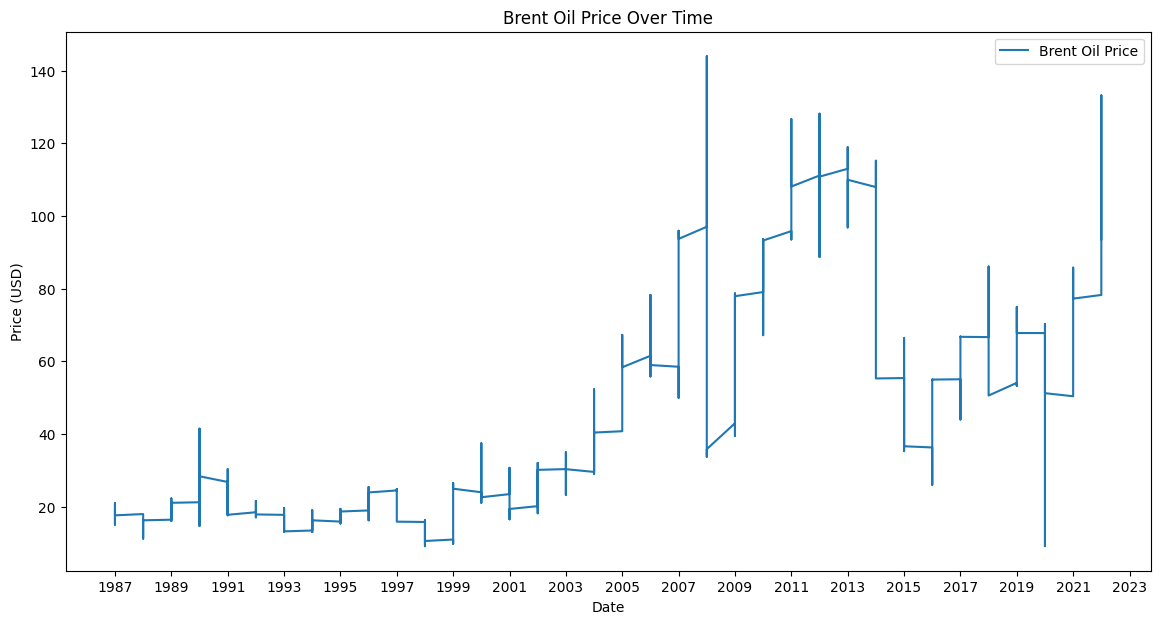

In [15]:
from scripts.plot import priceOverTime
priceOverTime(price_data)

>> ## Change Point Analysis

In [16]:
from scripts.change_point_analysis import *
change_point_analysis(price_data)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


ModuleNotFoundError: No module named 'prophet'

>> ## Advanced Analysis and Modelling of Brent Oil Prices

In [ ]:
# !pip install ruptures

In [ ]:
# ! pip install pymc3

In [ ]:
# # CUSUM method
# mean_price = price_data['Price'].mean()
# cusum = np.cumsum(price_data['Price'] - mean_price)
# plt.figure(figsize=(14, 7))
# plt.plot(price_data.index, cusum, label='CUSUM')
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel('Date')
# plt.ylabel('CUSUM Value')
# plt.title('CUSUM Analysis')
# plt.legend()
# plt.show()

###  Implementing Change Point Detection Using Bayesian Models

In [ ]:
# # Bayesian Change Point Detection using PyMC3
# with pm.Model() as model:
#     # Priors
#   mean_prior = pm.Normal('mean_prior', mu=mean_price, sigma=10)
#   change_point = pm.DiscreteUniform('change_point', lower=0, upper=len(price_data)-1)

#     # Likelihood
#   likelihood = pm.Normal('likelihood', mu=mean_prior, sigma=10, observed=price_data['Price'])

#     # Inference
#   trace = pm.sample(1000, tune=1000, cores=2)

# # Plot results
# pm.plot_posterior(trace)
# plt.show()

In [ ]:
# def changePointDetection(price_data):
#     prices = price_data['Price'].values
#     n = len(prices)

#     with pm.Model() as model:
#         change_point = pm.DiscreteUniform("change_point", lower=0, upper=n)

#         mean1 = pm.Normal("mean1", mu=np.mean(prices[:n//2]), sigma=np.std(prices[:n//2]))
#         mean2 = pm.Normal("mean2", mu=np.mean(prices[n//2:]), sigma=np.std(prices[n//2:]))
#         sigma = pm.HalfNormal("sigma", sigma=10)

#         idx = np.arange(n)
#         mean = pm.math.switch(idx < change_point, mean1, mean2)
#         obs = pm.Normal("obs", mu=mean, sigma=sigma, observed=prices)

#         trace = pm.sample(1500, tune=1500, target_accept=0.95, chains=4)

#     pm.plot_trace(trace,figsize=(20,20))
#     plt.show()


### Applying Time Series Analysis to Brent Oil Prices


To detect patterns, trends, and seasonality within Brent oil price data.

#### The parameters 
##### p, d, and 𝑞 in an ARIMA model represent the following:
##### p: The number of autoregressive (AR) terms. This parameter captures how past values affect the current value.
##### d: The order of differencing required to make the time series stationary (removing trends).
##### q: The number of moving average (MA) terms. This parameter accounts for past forecast errors.

### Perform ADF test

In [ ]:
adf_result = adfuller(price_data['Price'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

if adf_result[1] > 0.05:
    price_data['price_diff'] = price_data['Price'].diff().dropna()

ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287


### ACF and PACF

Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plots:
Use ACF and PACF plots to determine suitable values for 
p and q.
ACF plot: Shows how correlated a time series is with its lagged values. Helps in identifying the MA (q) order.
PACF plot: Shows the partial correlation of a time series with its lagged values. Helps in identifying the AR (p) order.

<Figure size 1200x600 with 0 Axes>

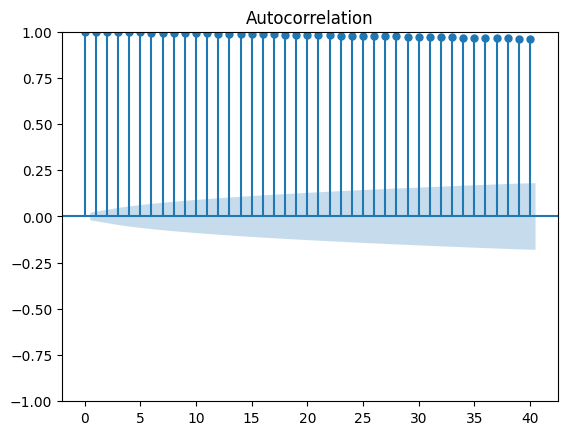

<Figure size 1200x600 with 0 Axes>

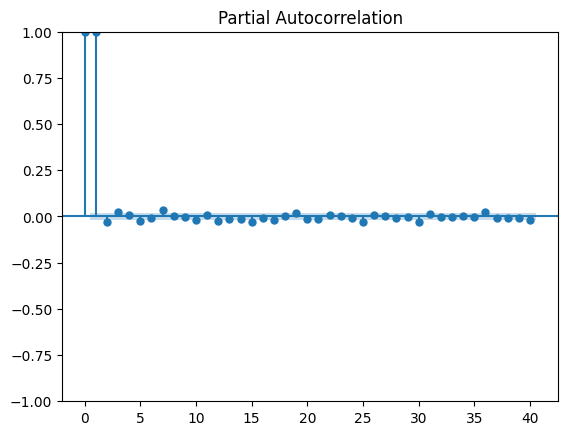

In [ ]:
from scripts.change_point_analysis import autoCorrAndPartialAutoCorr
autoCorrAndPartialAutoCorr(price_data)

##### p=1 (based on PACF plot),
##### d=1 (data was non-stationary),
##### q=1 (based on ACF plot),

>> ## ARIMA model trend analysis

In [19]:
train_size = int(len(price_data) * 0.8)
train, test = price_data[:train_size], price_data[train_size:]

In [20]:
from statsmodels.tsa.arima.model import ARIMA
from scripts.change_point_analysis import arimaModel
arima_forecast = arimaModel(price_data,test)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Fri, 21 Feb 2025   AIC                          29093.899
Time:                        19:05:50   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0